In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Training and Validation Plots

In [8]:
resnet_training = r"/kaggle/input/trainingresults/resnet_training_results.csv"
denseNet_training = r"/kaggle/input/trainingresults/densenet121_model_training_results.csv"
vgg_training = r"/kaggle/input/trainingresults/vgg19_training_results.csv"

In [9]:
resnet = pd.read_csv(resnet_training)
densenet = pd.read_csv(denseNet_training)
vgg19 = pd.read_csv(vgg_training)

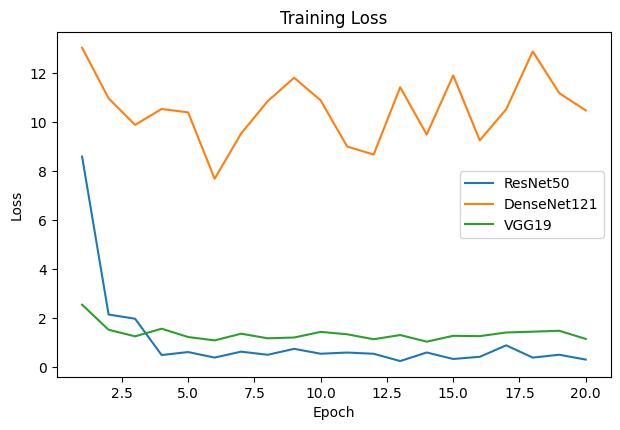

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(resnet['Epoch'], resnet['Train Loss'], label='ResNet50')
plt.plot(densenet['Epoch'], densenet['Train Loss'], label='DenseNet121')
plt.plot(vgg19['Epoch'], vgg19['Train Loss'], label='VGG19')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

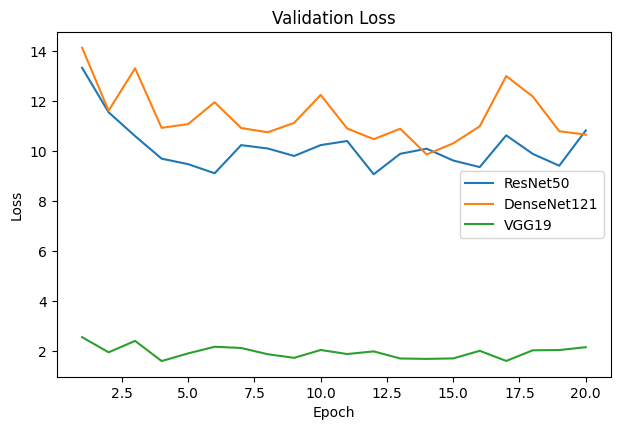

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(resnet['Epoch'], resnet['Validation Loss'], label='ResNet50')
plt.plot(densenet['Epoch'], densenet['Validation Loss'], label='DenseNet121')
plt.plot(vgg19['Epoch'], vgg19['Validation Loss'], label='VGG19')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

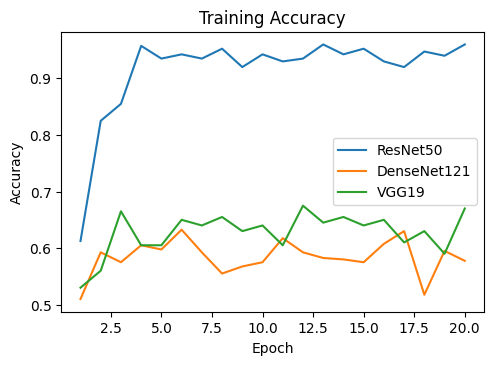

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(resnet['Epoch'], resnet['Train Accuracy'], label='ResNet50')
plt.plot(densenet['Epoch'], densenet['Train Accuracy'], label='DenseNet121')
plt.plot(vgg19['Epoch'], vgg19['Train Accuracy'], label='VGG19')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

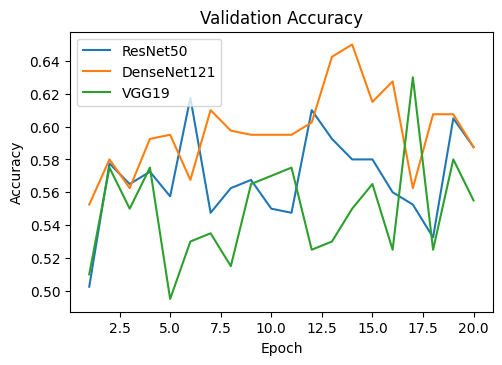

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(resnet['Epoch'], resnet['Validation Accuracy'], label='ResNet50')
plt.plot(densenet['Epoch'], densenet['Validation Accuracy'], label='DenseNet121')
plt.plot(vgg19['Epoch'], vgg19['Validation Accuracy'], label='VGG19')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Testing results 2way 3 shot Plotting

In [29]:
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

resnet_results = r"/kaggle/input/results/Results/Resnet/prototypical_model_results_resnet_2way_3shot.csv"
denseNet_results = r"/kaggle/input/results/Results/DenseNet/prototypical_model_results_densenet121_2way_3shot.csv"
vgg_results = r"/kaggle/input/results/Results/VGG/prototypical_model_results_vgg_2way_3shot.csv"

resnet_data = pd.read_csv(resnet_results)
densenet_data = pd.read_csv(denseNet_results)
vgg19_data = pd.read_csv(vgg_results)

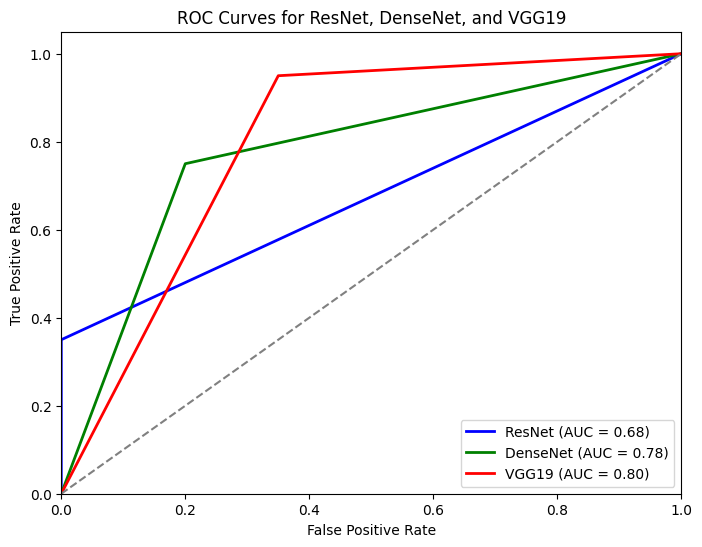

In [68]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# File paths
resnet_results = r"/kaggle/input/results/Results/Resnet/prototypical_model_results_resnet_2way_3shot.csv"
denseNet_results = r"/kaggle/input/results/Results/DenseNet/prototypical_model_results_densenet121_2way_3shot.csv"
vgg_results = r"/kaggle/input/results/Results/VGG/prototypical_model_results_vgg_2way_3shot.csv"

resnet_data = pd.read_csv(resnet_results)
densenet_data = pd.read_csv(denseNet_results)
vgg19_data = pd.read_csv(vgg_results)

y_true_resnet = resnet_data['True Class'].values
y_pred_resnet = resnet_data['Pred Class'].values

y_true_densenet = densenet_data['True Class'].values
y_pred_densenet = densenet_data['Pred Class'].values

y_true_vgg19 = vgg19_data['True Class'].values
y_pred_vgg19 = vgg19_data['Pred Class'].values

# Flatten the arrays
y_true_resnet_flat = y_true_resnet.flatten()
y_pred_resnet_flat = y_pred_resnet.flatten()

y_true_densenet_flat = y_true_densenet.flatten()
y_pred_densenet_flat = y_pred_densenet.flatten()

y_true_vgg19_flat = y_true_vgg19.flatten()
y_pred_vgg19_flat = y_pred_vgg19.flatten()

# Calculate ROC curve for ResNet
fpr_resnet, tpr_resnet, _ = roc_curve(y_true_resnet_flat, y_pred_resnet_flat, pos_label=1)
roc_auc_resnet = auc(fpr_resnet, tpr_resnet)

# Calculate ROC curve for DenseNet
fpr_densenet, tpr_densenet, _ = roc_curve(y_true_densenet_flat, y_pred_densenet_flat, pos_label=1)
roc_auc_densenet = auc(fpr_densenet, tpr_densenet)

# Calculate ROC curve for VGG19
fpr_vgg19, tpr_vgg19, _ = roc_curve(y_true_vgg19_flat, y_pred_vgg19_flat, pos_label=1)
roc_auc_vgg19 = auc(fpr_vgg19, tpr_vgg19)

# Plot ROC curves for all models in one plot
plt.figure(figsize=(8, 6))

# ResNet ROC curve
plt.plot(fpr_resnet, tpr_resnet, color='blue', lw=2, label=f'ResNet (AUC = {roc_auc_resnet:.2f})')

# DenseNet ROC curve
plt.plot(fpr_densenet, tpr_densenet, color='green', lw=2, label=f'DenseNet (AUC = {roc_auc_densenet:.2f})')

# VGG19 ROC curve
plt.plot(fpr_vgg19, tpr_vgg19, color='red', lw=2, label=f'VGG19 (AUC = {roc_auc_vgg19:.2f})')

# Add diagonal line for random model
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Label the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for ResNet, DenseNet, and VGG19')

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [37]:
def get_classification_metrics(data):
    y_true = data["True Class"]
    y_pred = data["Pred Class"]
    

    report = classification_report(y_true, y_pred, output_dict=True)
    print(report)
    print()
    
    
    avg_precision = report["weighted avg"]["precision"]
    avg_recall = report["weighted avg"]["recall"]
    avg_f1_score = report["weighted avg"]["f1-score"]
    
    return avg_precision, avg_recall, avg_f1_score

In [38]:
resnet_metrics = get_classification_metrics(resnet_data)
densenet_metrics = get_classification_metrics(densenet_data)
vgg19_metrics = get_classification_metrics(vgg19_data)

{'0': {'precision': 0.6060606060606061, 'recall': 1.0, 'f1-score': 0.7547169811320755, 'support': 20}, '1': {'precision': 1.0, 'recall': 0.35, 'f1-score': 0.5185185185185185, 'support': 20}, 'accuracy': 0.675, 'macro avg': {'precision': 0.803030303030303, 'recall': 0.675, 'f1-score': 0.636617749825297, 'support': 40}, 'weighted avg': {'precision': 0.8030303030303031, 'recall': 0.675, 'f1-score': 0.636617749825297, 'support': 40}}

{'0': {'precision': 0.7619047619047619, 'recall': 0.8, 'f1-score': 0.7804878048780488, 'support': 20}, '1': {'precision': 0.7894736842105263, 'recall': 0.75, 'f1-score': 0.7692307692307692, 'support': 20}, 'accuracy': 0.775, 'macro avg': {'precision': 0.7756892230576441, 'recall': 0.775, 'f1-score': 0.774859287054409, 'support': 40}, 'weighted avg': {'precision': 0.7756892230576441, 'recall': 0.775, 'f1-score': 0.774859287054409, 'support': 40}}

{'0': {'precision': 0.9285714285714286, 'recall': 0.65, 'f1-score': 0.7647058823529412, 'support': 20}, '1': {'pre

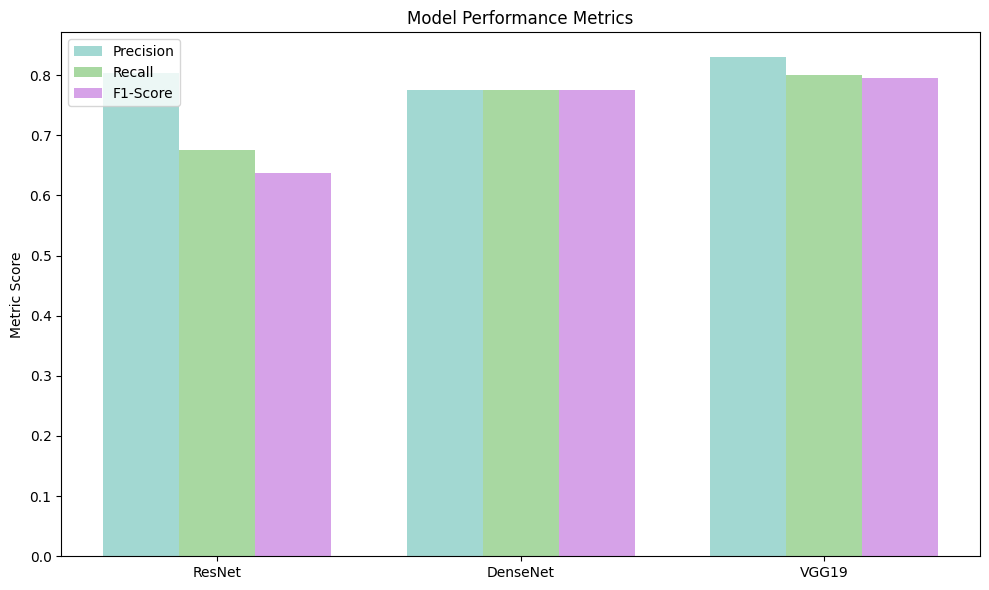

In [42]:
metrics_df = pd.DataFrame({
    "Model": ["ResNet", "DenseNet", "VGG19"],
    "Precision": [resnet_metrics[0], densenet_metrics[0], vgg19_metrics[0]],
    "Recall": [resnet_metrics[1], densenet_metrics[1], vgg19_metrics[1]],
    "F1-Score": [resnet_metrics[2], densenet_metrics[2], vgg19_metrics[2]],
})

bar_width = 0.25
x = np.arange(len(metrics_df["Model"]))

fig, ax = plt.subplots(figsize=(10, 6))


colors = {
    "Precision": "#A2D8D2",  
    "Recall": "#A8D8A1",   
    "F1-Score": "#D6A2E8", 
}


ax.bar(x - bar_width, metrics_df["Precision"], width=bar_width, label="Precision", color=colors["Precision"])
ax.bar(x, metrics_df["Recall"], width=bar_width, label="Recall", color=colors["Recall"])
ax.bar(x + bar_width, metrics_df["F1-Score"], width=bar_width, label="F1-Score", color=colors["F1-Score"])


ax.set_xticks(x)
ax.set_xticklabels(metrics_df["Model"])
ax.set_ylabel("Metric Score")
ax.set_title("Model Performance Metrics")
ax.legend()

plt.tight_layout()
plt.show()

### 2 Way 5 shot Plotting

In [45]:
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

resnet_results = r"/kaggle/input/results/Results/Resnet/prototypical_model_results_resnet_2way_5shot.csv"
denseNet_results = r"/kaggle/input/results/Results/DenseNet/prototypical_model_test_results_densenet121_model_2way_5shot.csv"
vgg_results = r"/kaggle/input/results/Results/VGG/prototypical_model_results_vgg_2way_5shot.csv"

resnet_data_2way5shot = pd.read_csv(resnet_results)
densenet_data_2way5shot = pd.read_csv(denseNet_results)
vgg19_data_2way5shot = pd.read_csv(vgg_results)

In [51]:
resnet_metrics = get_classification_metrics(resnet_data_2way5shot)

vgg19_metrics = get_classification_metrics(vgg19_data_2way5shot)

{'0': {'precision': 1.0, 'recall': 0.65, 'f1-score': 0.787878787878788, 'support': 20}, '1': {'precision': 0.7407407407407407, 'recall': 1.0, 'f1-score': 0.851063829787234, 'support': 20}, 'accuracy': 0.825, 'macro avg': {'precision': 0.8703703703703703, 'recall': 0.825, 'f1-score': 0.819471308833011, 'support': 40}, 'weighted avg': {'precision': 0.8703703703703702, 'recall': 0.825, 'f1-score': 0.819471308833011, 'support': 40}}

{'0': {'precision': 0.8, 'recall': 0.8, 'f1-score': 0.8000000000000002, 'support': 15}, '1': {'precision': 0.8, 'recall': 0.8, 'f1-score': 0.8000000000000002, 'support': 15}, 'accuracy': 0.8, 'macro avg': {'precision': 0.8, 'recall': 0.8, 'f1-score': 0.8000000000000002, 'support': 30}, 'weighted avg': {'precision': 0.8, 'recall': 0.8, 'f1-score': 0.8000000000000002, 'support': 30}}



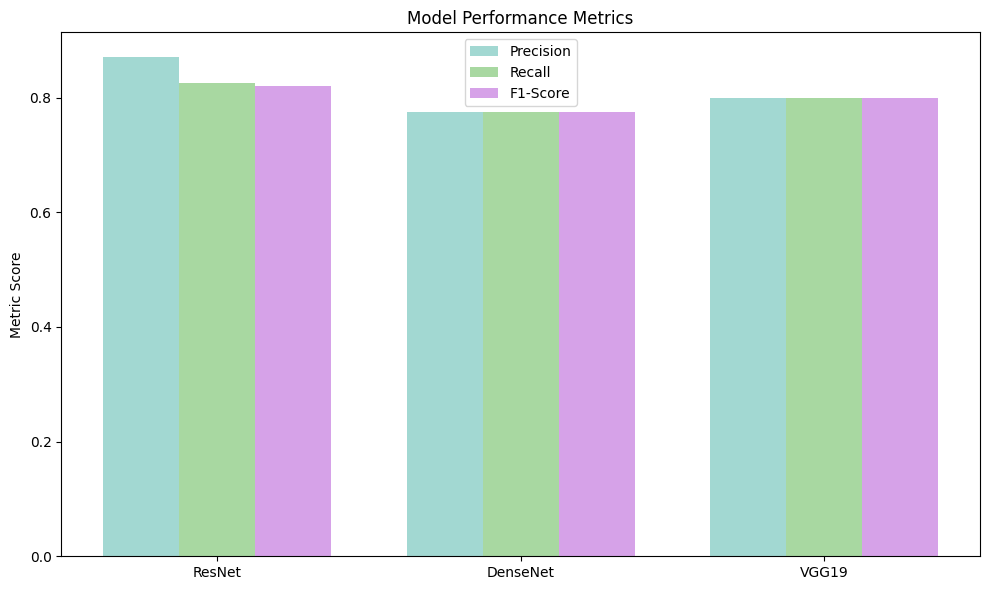

In [52]:
metrics_df = pd.DataFrame({
    "Model": ["ResNet", "DenseNet", "VGG19"],
    "Precision": [resnet_metrics[0], densenet_metrics[0], vgg19_metrics[0]],
    "Recall": [resnet_metrics[1], densenet_metrics[1], vgg19_metrics[1]],
    "F1-Score": [resnet_metrics[2], densenet_metrics[2], vgg19_metrics[2]],
})

bar_width = 0.25
x = np.arange(len(metrics_df["Model"]))

fig, ax = plt.subplots(figsize=(10, 6))


colors = {
    "Precision": "#A2D8D2",  
    "Recall": "#A8D8A1",   
    "F1-Score": "#D6A2E8", 
}


ax.bar(x - bar_width, metrics_df["Precision"], width=bar_width, label="Precision", color=colors["Precision"])
ax.bar(x, metrics_df["Recall"], width=bar_width, label="Recall", color=colors["Recall"])
ax.bar(x + bar_width, metrics_df["F1-Score"], width=bar_width, label="F1-Score", color=colors["F1-Score"])


ax.set_xticks(x)
ax.set_xticklabels(metrics_df["Model"])
ax.set_ylabel("Metric Score")
ax.set_title("Model Performance Metrics")
ax.legend()

plt.tight_layout()
plt.show()

In [61]:
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

resnet_results_3way5Shot = r"/kaggle/input/results/Results/Resnet/prototypical_model_results_resnet_3way_5shot.csv"
denseNet_results_3way5Shot = r"/kaggle/input/results/Results/DenseNet/prototypical_model_results_densenet121_3way_5shot.xlsx"
vgg_results_3way5Shot = r"/kaggle/input/results/Results/VGG/prototypical_model_results_vgg_3way_5shot.csv"

resnet_data = pd.read_csv(resnet_results_3way5Shot)
densenet_data = pd.read_excel(denseNet_results_3way5Shot)
vgg19_data = pd.read_csv(vgg_results_3way5Shot)

In [62]:
resnet_metrics = get_classification_metrics(resnet_data)
densenet_metrics = get_classification_metrics(densenet_data)
vgg19_metrics = get_classification_metrics(vgg19_data)

{'0': {'precision': 0.95, 'recall': 0.76, 'f1-score': 0.8444444444444444, 'support': 25}, '1': {'precision': 0.5, 'recall': 0.76, 'f1-score': 0.6031746031746031, 'support': 25}, '2': {'precision': 0.6470588235294118, 'recall': 0.44, 'f1-score': 0.5238095238095238, 'support': 25}, 'accuracy': 0.6533333333333333, 'macro avg': {'precision': 0.6990196078431373, 'recall': 0.6533333333333333, 'f1-score': 0.6571428571428571, 'support': 75}, 'weighted avg': {'precision': 0.6990196078431372, 'recall': 0.6533333333333333, 'f1-score': 0.6571428571428571, 'support': 75}}

{'0': {'precision': 1.0, 'recall': 0.8, 'f1-score': 0.888888888888889, 'support': 25}, '1': {'precision': 0.4883720930232558, 'recall': 0.84, 'f1-score': 0.6176470588235294, 'support': 25}, '2': {'precision': 0.6666666666666666, 'recall': 0.32, 'f1-score': 0.43243243243243246, 'support': 25}, 'accuracy': 0.6533333333333333, 'macro avg': {'precision': 0.7183462532299741, 'recall': 0.6533333333333334, 'f1-score': 0.6463227933816169

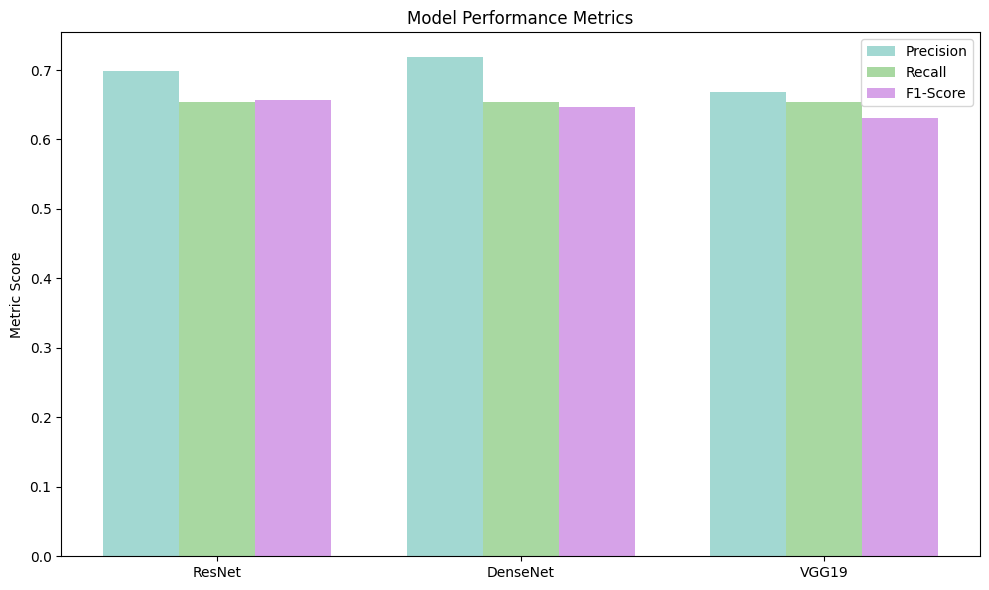

In [63]:
metrics_df = pd.DataFrame({
    "Model": ["ResNet", "DenseNet", "VGG19"],
    "Precision": [resnet_metrics[0], densenet_metrics[0], vgg19_metrics[0]],
    "Recall": [resnet_metrics[1], densenet_metrics[1], vgg19_metrics[1]],
    "F1-Score": [resnet_metrics[2], densenet_metrics[2], vgg19_metrics[2]],
})

bar_width = 0.25
x = np.arange(len(metrics_df["Model"]))

fig, ax = plt.subplots(figsize=(10, 6))


colors = {
    "Precision": "#A2D8D2",  
    "Recall": "#A8D8A1",   
    "F1-Score": "#D6A2E8", 
}


ax.bar(x - bar_width, metrics_df["Precision"], width=bar_width, label="Precision", color=colors["Precision"])
ax.bar(x, metrics_df["Recall"], width=bar_width, label="Recall", color=colors["Recall"])
ax.bar(x + bar_width, metrics_df["F1-Score"], width=bar_width, label="F1-Score", color=colors["F1-Score"])


ax.set_xticks(x)
ax.set_xticklabels(metrics_df["Model"])
ax.set_ylabel("Metric Score")
ax.set_title("Model Performance Metrics")
ax.legend()

plt.tight_layout()
plt.show()

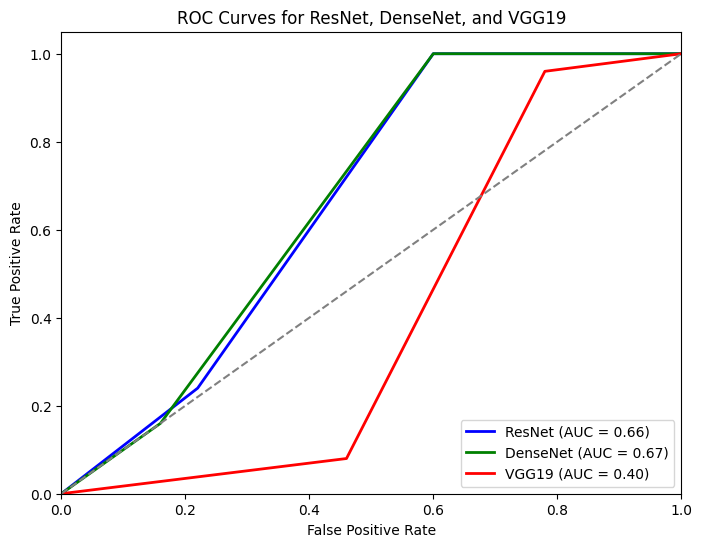

In [67]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# File paths
resnet_results_3way5Shot = r"/kaggle/input/results/Results/Resnet/prototypical_model_results_resnet_3way_5shot.csv"
denseNet_results_3way5Shot = r"/kaggle/input/results/Results/DenseNet/prototypical_model_results_densenet121_3way_5shot.xlsx"
vgg_results_3way5Shot = r"/kaggle/input/results/Results/VGG/prototypical_model_results_vgg_3way_5shot.csv"

# Load the data
resnet_data = pd.read_csv(resnet_results_3way5Shot)
densenet_data = pd.read_excel(denseNet_results_3way5Shot)
vgg19_data = pd.read_csv(vgg_results_3way5Shot)

# Extract 'True Class' and 'Pred Class' columns
y_true_resnet = resnet_data['True Class'].values
y_pred_resnet = resnet_data['Pred Class'].values

y_true_densenet = densenet_data['True Class'].values
y_pred_densenet = densenet_data['Pred Class'].values

y_true_vgg19 = vgg19_data['True Class'].values
y_pred_vgg19 = vgg19_data['Pred Class'].values

# Flatten the arrays
y_true_resnet_flat = y_true_resnet.flatten()
y_pred_resnet_flat = y_pred_resnet.flatten()

y_true_densenet_flat = y_true_densenet.flatten()
y_pred_densenet_flat = y_pred_densenet.flatten()

y_true_vgg19_flat = y_true_vgg19.flatten()
y_pred_vgg19_flat = y_pred_vgg19.flatten()

# Calculate ROC curve for ResNet
fpr_resnet, tpr_resnet, _ = roc_curve(y_true_resnet_flat, y_pred_resnet_flat, pos_label=1)
roc_auc_resnet = auc(fpr_resnet, tpr_resnet)

# Calculate ROC curve for DenseNet
fpr_densenet, tpr_densenet, _ = roc_curve(y_true_densenet_flat, y_pred_densenet_flat, pos_label=1)
roc_auc_densenet = auc(fpr_densenet, tpr_densenet)

# Calculate ROC curve for VGG19
fpr_vgg19, tpr_vgg19, _ = roc_curve(y_true_vgg19_flat, y_pred_vgg19_flat, pos_label=1)
roc_auc_vgg19 = auc(fpr_vgg19, tpr_vgg19)

# Plot ROC curves for all models in one plot
plt.figure(figsize=(8, 6))

# ResNet ROC curve
plt.plot(fpr_resnet, tpr_resnet, color='blue', lw=2, label=f'ResNet (AUC = {roc_auc_resnet:.2f})')

# DenseNet ROC curve
plt.plot(fpr_densenet, tpr_densenet, color='green', lw=2, label=f'DenseNet (AUC = {roc_auc_densenet:.2f})')

# VGG19 ROC curve
plt.plot(fpr_vgg19, tpr_vgg19, color='red', lw=2, label=f'VGG19 (AUC = {roc_auc_vgg19:.2f})')

# Add diagonal line for random model
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Label the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for ResNet, DenseNet, and VGG19')

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()